## Problem Statement
Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### Objective
The objective  is to create a machine learning model to predict which individuals are most likely to have or use a bank account.

The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

#### Importing necessary libraries and loading the dataset

In [70]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
train_df = pd.read_csv("/content/Train.csv")
test_df = pd.read_csv("/content/Test.csv")

In [3]:
# display first 5 rows of train dataset
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Lets chck the data types of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


We can observe there are no missing values and the data types have been accurately mapped to each column(feature)

In [5]:
# Lets check the shape of our data
train_df.shape

(23524, 13)

We have 23,524 instances and 13 features in our train data

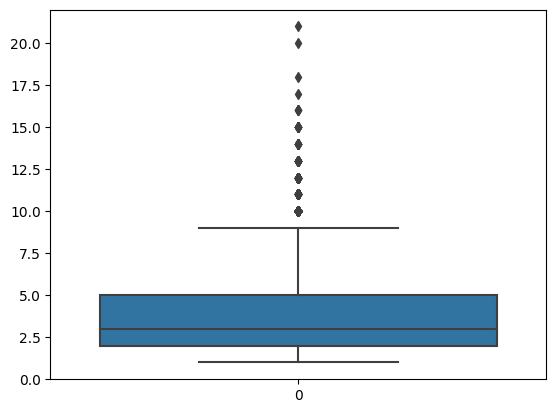

In [6]:
# Lets check for outliers
sns.boxplot(data=train_df['household_size'])
plt.show()

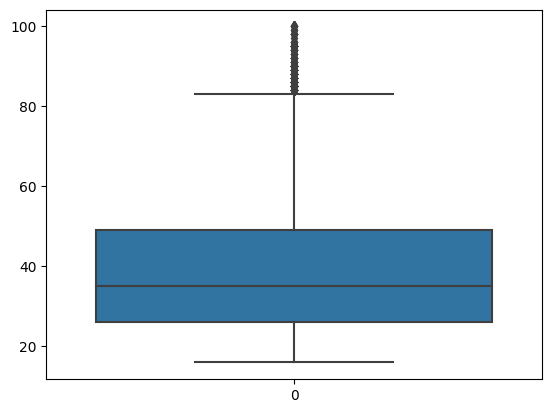

In [7]:
sns.boxplot(data=train_df['age_of_respondent'])
plt.show()

We have outliers in both the age and household size columns. We will leave the outliers in for our first experiment and then for our second experiment we will handle the outliers and see how our models will fair in each case.

In [8]:
# Lets check for duplicates
train_df.duplicated().sum().sum()

0

We have no duplicates

The dataset we have is super clean, which means we can dive straight into exploratory data analysis! Our goal is to look at how different variables are related to the bank account feature, which will give us an idea about whether someone has a bank account or not. So, let's get started and see what insights we can uncover!

### Exploratory Data Analysis

#### 1. Univariate Analysis

In this section lets explore each variable independently

In [9]:
# dipslaying the dataframe
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Rwanda'),
  Text(1, 0, 'Tanzania'),
  Text(2, 0, 'Kenya'),
  Text(3, 0, 'Uganda')])

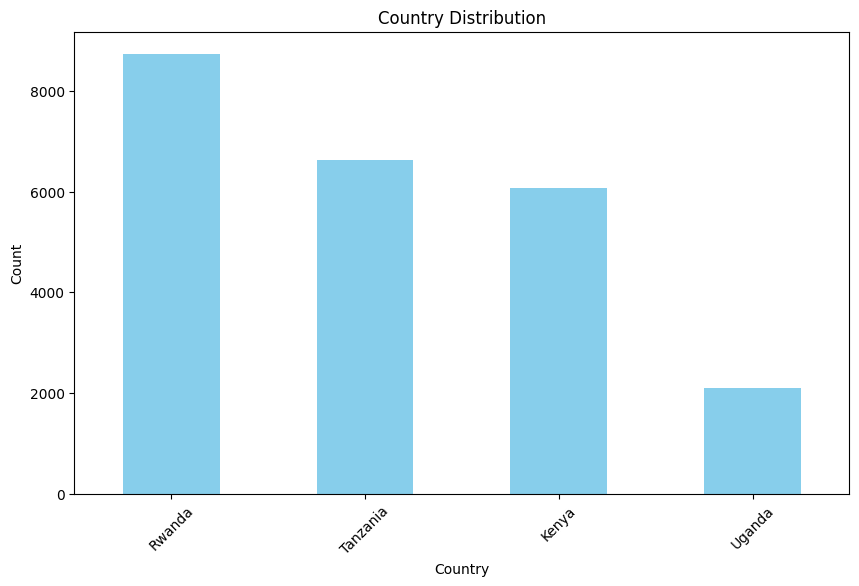

In [10]:
# Plotting a bar plot to visualise the country column
# counting distinct categories
country_counts = train_df['country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels

The dataset consists of many instances(respondents)  from Rwanda, while there are fewer instances from Uganda.

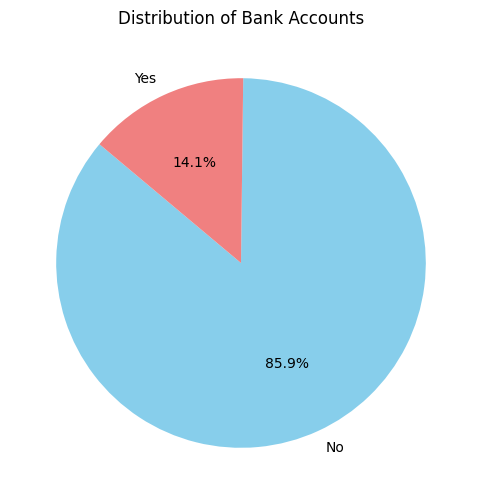

In [11]:
# Lets explore how many individuals have a bank account or not
bank_account_counts = train_df['bank_account'].value_counts()
labels = bank_account_counts.index
sizes = bank_account_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Bank Accounts')
plt.show()

85.9% of the respondents do not have a bank account. This finding warrants a thorough examination in our bivariate and multivariate analyses to identify the potential factors that influence this trend.

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

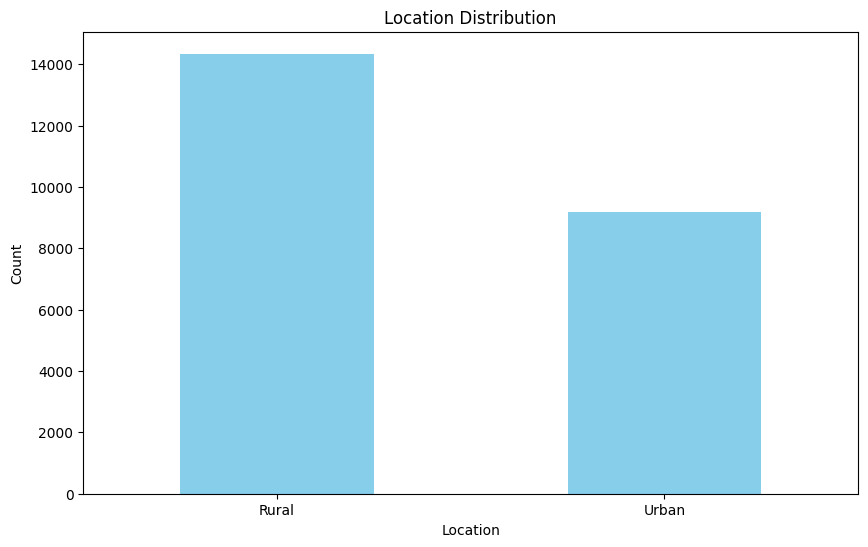

In [12]:
# Plotting a bar plot to visualise the location(rural/urban) column
# counting distinct categories
country_counts = train_df['location_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=360)  # Rotate x-axis labels

We have approximately, 14,000 repondents residing in Rural areas and 10,000 in urban areas

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

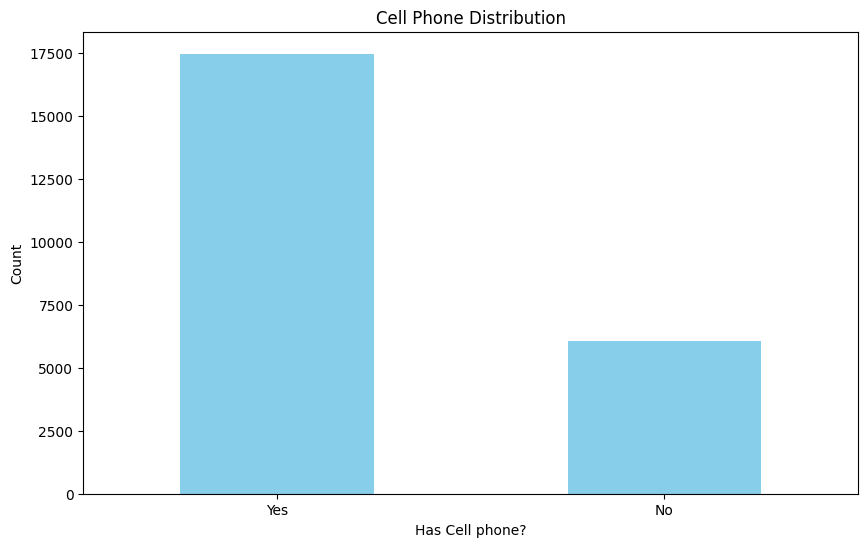

In [13]:
# Plotting a bar plot to visualise the cellphone_access column
# counting distinct categories
country_counts = train_df['cellphone_access'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Cell Phone Distribution')
plt.xlabel('Has Cell phone?')
plt.ylabel('Count')
plt.xticks(rotation=360)

Majority of the respondents do have access to a cell phone

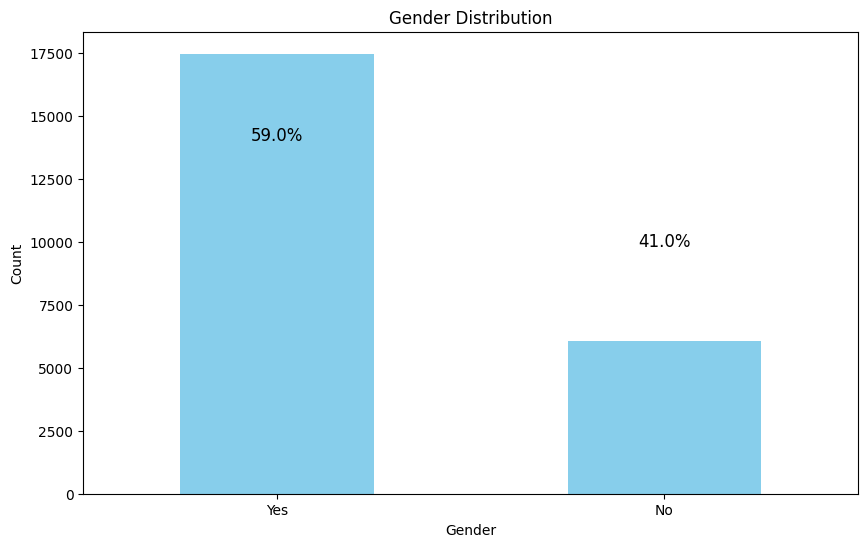

In [14]:
# Plotting a bar plot to visualise the Gender column
# counting distinct categories
gender_counts = train_df['gender_of_respondent'].value_counts()

# Calculate percentages
total_responses = len(train_df)
percentage_values = (gender_counts / total_responses) * 100
plt.figure(figsize=(10, 6))
ax = country_counts.plot(kind='bar', color='skyblue')

# Annotate the bars with percentage values
for i, count in enumerate(gender_counts):
    percentage = percentage_values[i]
    ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.show()

59% of respondents in the dataset are female while 41% are male. Hence majority of respondents are female

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000')])

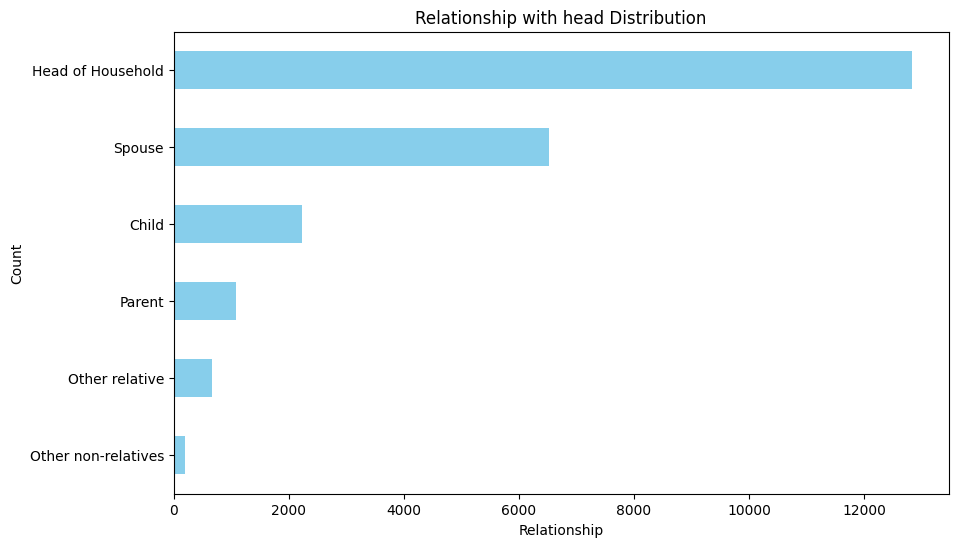

In [15]:
# Plotting a bar plot to visualise the relationship_with_head column
# counting distinct categories
country_counts = train_df['relationship_with_head'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color='skyblue')
plt.title('Relationship with head Distribution')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.gca().invert_yaxis()
plt.xticks(rotation=360)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

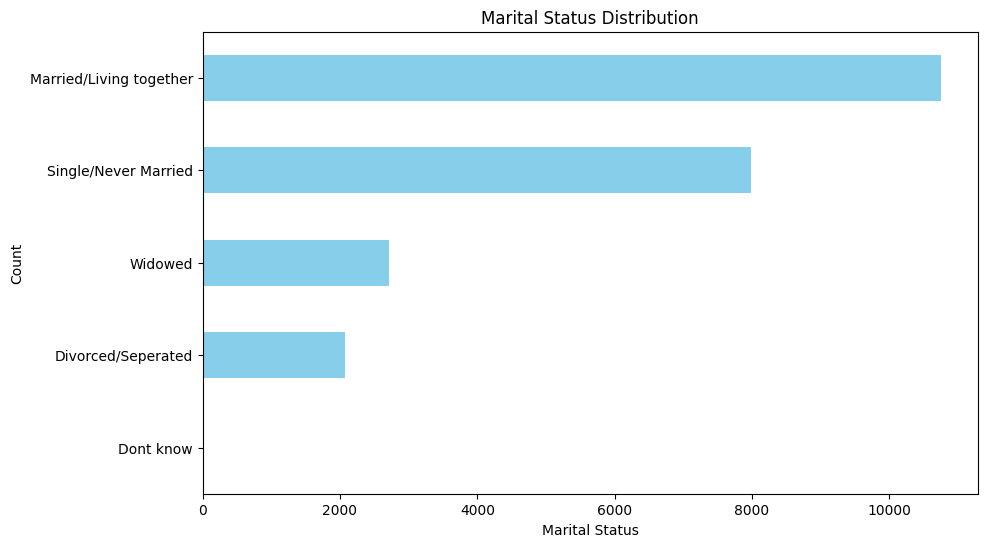

In [16]:
# Plotting a bar plot to visualise the marital_status column
# counting distinct categories
country_counts = train_df['marital_status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color='skyblue')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.gca().invert_yaxis()
plt.xticks(rotation=360)

#### 2. BiVariate Analysis

In [17]:
# dispalying the data frame
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


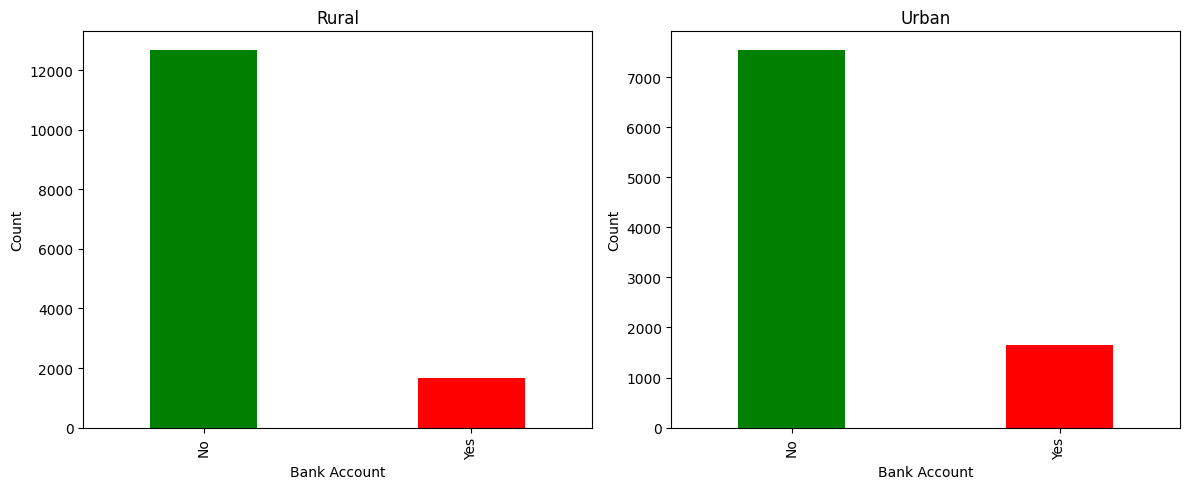

In [18]:
# Lets check the relationship between bank account access and location type

# Group the data by location type and bank account status
grouped_data = train_df.groupby(['location_type', 'bank_account']).size().unstack(fill_value=0)

# Create two bar charts side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first bar chart for "Rural"
grouped_data.loc['Rural'].plot(kind='bar', ax=ax[0], color=['green', 'red'], width=0.4)
ax[0].set_title('Rural')
ax[0].set_xlabel('Bank Account')
ax[0].set_ylabel('Count')

# Plot the second bar chart for "Urban"
grouped_data.loc['Urban'].plot(kind='bar', ax=ax[1], color=['green', 'red'], width=0.4)
ax[1].set_title('Urban')
ax[1].set_xlabel('Bank Account')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

- From the plot we can observe that majority of the individuals both in rual and urban settings do not have a bank account.

- We can also see that among those who do have an account, many of them are in the urban area

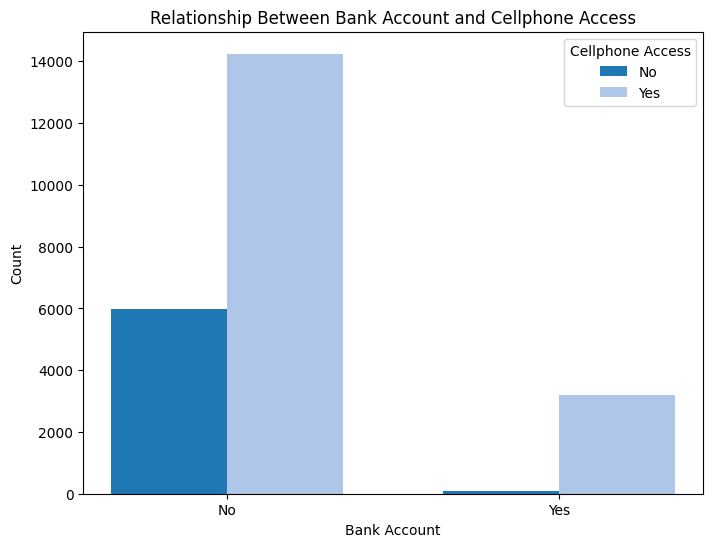

In [19]:
# Create a pivot table to reshape the data
pivot_table = train_df.pivot_table(index='bank_account', columns='cellphone_access', aggfunc='size', fill_value=0)

# Define distinct blue colors
colors = ['#1f77b4', '#aec7e8']

# Create a grouped bar chart
width = 0.35
x = np.arange(len(pivot_table.index))

fig, ax = plt.subplots(figsize=(8, 6))

for i, access_status in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[access_status], width, label=access_status, color=colors[i])

# Add labels and title
ax.set_xlabel('Bank Account')
ax.set_ylabel('Count')
ax.set_title('Relationship Between Bank Account and Cellphone Access')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(pivot_table.index)
ax.legend(title='Cellphone Access')

# Show the plot
plt.show()

We can observe that a significant number of individuals who do not have a bank account also lack a cellphone. In contrast, those who do own a bank account majority of them have access to a cellphone.

However, there is also a significant amount of individuals who do own a cellphone but have no bank account.

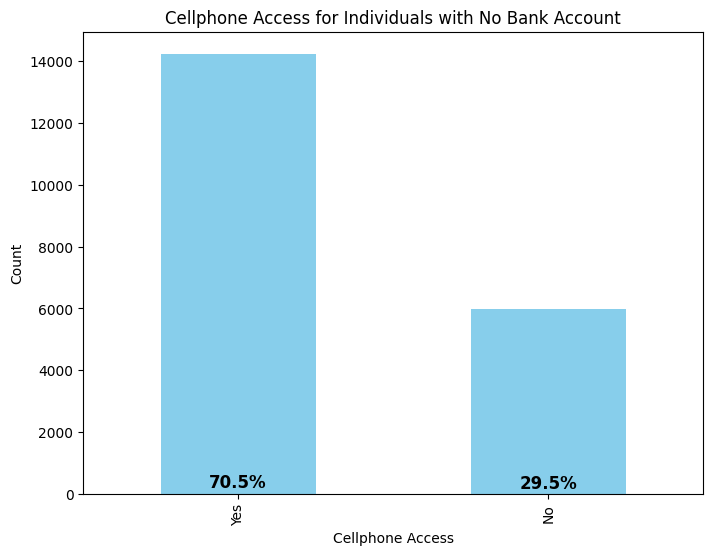

In [20]:
# Lets check spscifically those who do not have a bank account and get % of those who do not own cell phone
# Filter individuals with no bank account
filtered_data = train_df[train_df['bank_account'] == 'No']

# Calculate the percentage of cellphone access
cellphone_access_percentage = (filtered_data['cellphone_access'].value_counts() / len(filtered_data)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = filtered_data['cellphone_access'].value_counts().plot(kind='bar', color='skyblue')

# Add percentage labels on top of the bars
for i, v in enumerate(cellphone_access_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('Cellphone Access')
plt.ylabel('Count')
plt.title('Cellphone Access for Individuals with No Bank Account')

# Show the plot
plt.show()

This further analysis shows a relationship between individuals owning a bank account and their cellphone access.

Among the surveyed individuals who do not own a bank account, a substantial majority also lacks access to a cellphone. Specifically, **29.5%** of individuals without a bank account do not have a cellphone.

Additionally,**70.5%** of individuals without a bank account have access to a cellphone.

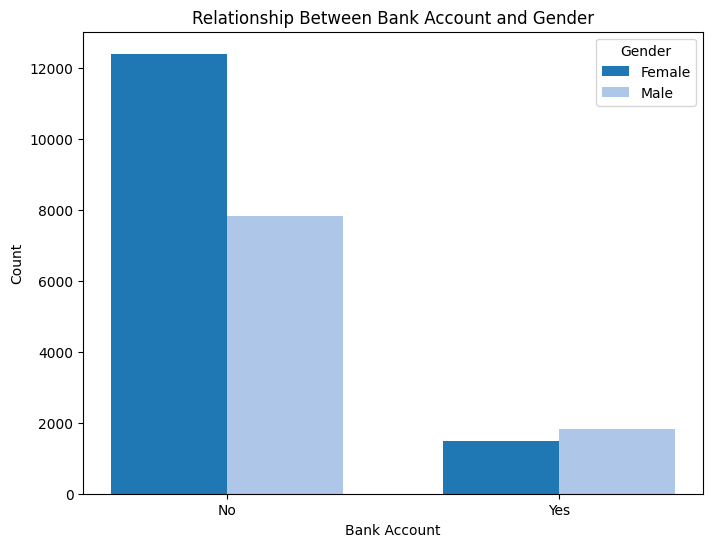

In [21]:
# Lets check the relationship between bank account access and Gender
# Create a pivot table to reshape the data
pivot_table = train_df.pivot_table(index='bank_account', columns='gender_of_respondent', aggfunc='size', fill_value=0)

# Define distinct blue colors
colors = ['#1f77b4', '#aec7e8']

# Create a grouped bar chart
width = 0.35
x = np.arange(len(pivot_table.index))

fig, ax = plt.subplots(figsize=(8, 6))

for i, access_status in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[access_status], width, label=access_status, color=colors[i])

# Add labels and title
ax.set_xlabel('Bank Account')
ax.set_ylabel('Count')
ax.set_title('Relationship Between Bank Account and Gender')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(pivot_table.index)
ax.legend(title='Gender')

# Show the plot
plt.show()

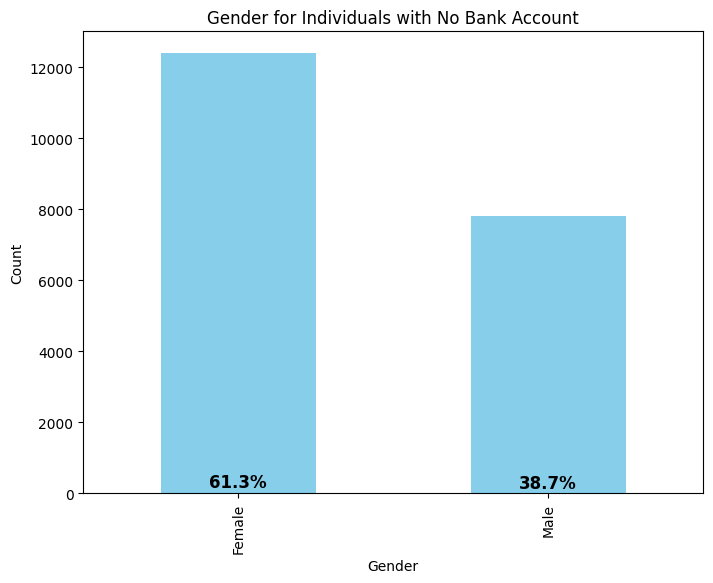

In [22]:
# Lets check specifically those who do not have a bank account and get %
# Filter individuals with no bank account
filtered_data = train_df[train_df['bank_account'] == 'No']

# Calculate the percentage
gender_percentage = (filtered_data['gender_of_respondent'].value_counts() / len(filtered_data)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = filtered_data['gender_of_respondent'].value_counts().plot(kind='bar', color='skyblue')

# Add percentage labels on top of the bars
for i, v in enumerate(gender_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender for Individuals with No Bank Account')

# Show the plot
plt.show()

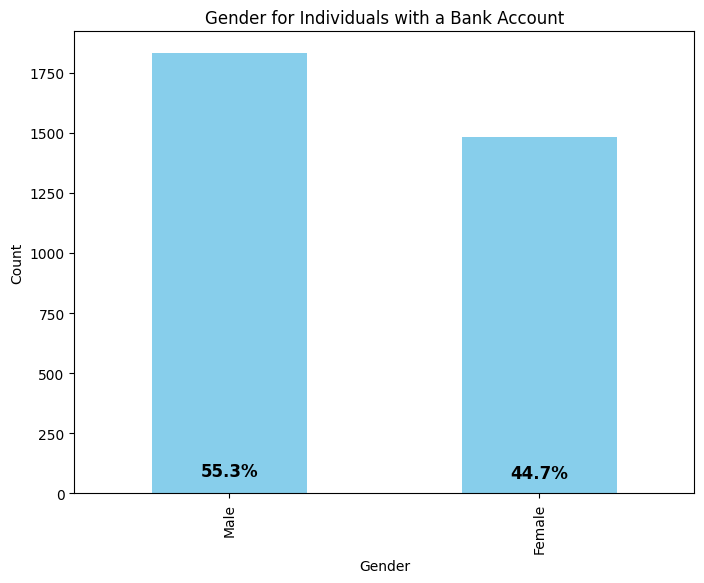

In [23]:
# Lets check specifically those who have a bank account and get %
# Filter individuals with a bank account
filtered_data = train_df[train_df['bank_account'] == 'Yes']

# Calculate the percentage
gender_percentage = (filtered_data['gender_of_respondent'].value_counts() / len(filtered_data)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = filtered_data['gender_of_respondent'].value_counts().plot(kind='bar', color='skyblue')

# Add percentage labels on top of the bars
for i, v in enumerate(gender_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender for Individuals with a Bank Account')

# Show the plot
plt.show()

The data reveals a gender disparity in bank account ownership, with a higher number of females lacking a bank account compared to males. Specifically, the majority of respondents without a bank account are female, whereas the majority of those with a bank account are male. Further analysis of the data indicates that among individuals without a bank account, 61.3% of females do not have one, in contrast to 38.7% of males. Conversely, among those with a bank account, 55.3% of males possess one, while only 44.7% of females do.

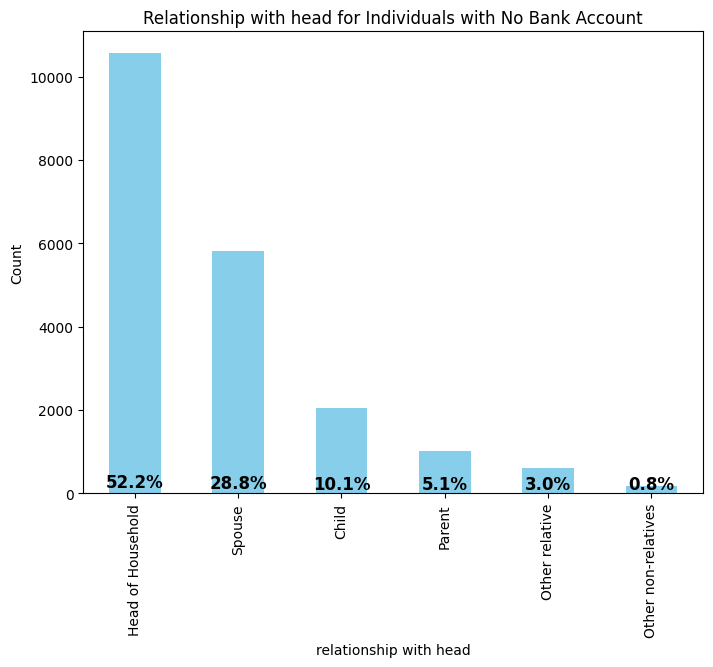

In [24]:
# Lets check the relationship between bank account access and relationship with head
# Lets check specifically those who do not have a bank account and get %
# Filter individuals with no bank account
filtered_data = train_df[train_df['bank_account'] == 'No']

# Calculate the percentage
head_percentage = (filtered_data['relationship_with_head'].value_counts() / len(filtered_data)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = filtered_data['relationship_with_head'].value_counts().plot(kind='bar', color='skyblue')

# Add percentage labels on top of the bars
for i, v in enumerate(head_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('relationship with head')
plt.ylabel('Count')
plt.title('Relationship with head for Individuals with No Bank Account')

# Show the plot
plt.show()

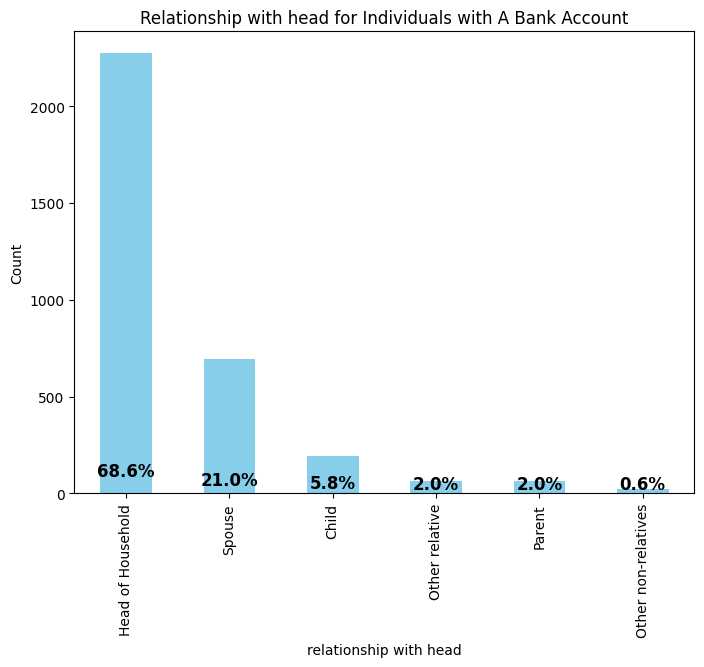

In [25]:
# Lets check the relationship between bank account access and relationship with head
# Lets check specifically those who  have a bank account and get %
# Filter individuals with no bank account
filtered_data = train_df[train_df['bank_account'] == 'Yes']

# Calculate the percentage
head_percentage = (filtered_data['relationship_with_head'].value_counts() / len(filtered_data)) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = filtered_data['relationship_with_head'].value_counts().plot(kind='bar', color='skyblue')

# Add percentage labels on top of the bars
for i, v in enumerate(head_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('relationship with head')
plt.ylabel('Count')
plt.title('Relationship with head for Individuals with A Bank Account')

# Show the plot
plt.show()

From the respondents answers, the head of the households appear to have a higher representation among both those with a bank account (68.6%) and those without a bank account (52.2%).

The Spouse category also seems significant, with 21% of those with a bank account and 28.8% of those without a bank account.

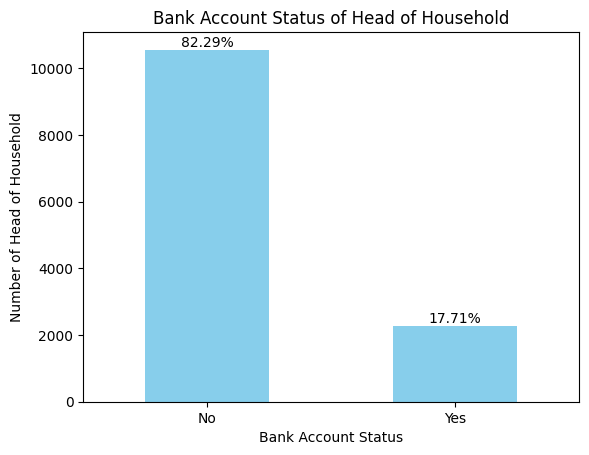

In [26]:
# Let's explore the % of "Head of household" category that have bank account and those that do not

# Filter the data for the "Head of household" category
head_of_household = train_df[train_df['relationship_with_head'] == 'Head of Household']

# Create a bar chart to visualize the bank account status of Head of Household
bank_account_counts = head_of_household['bank_account'].value_counts()
ax = bank_account_counts.plot(kind='bar', rot=0, color='skyblue')

# Adding labels and title
plt.xlabel('Bank Account Status')
plt.ylabel('Number of Head of Household')
plt.title('Bank Account Status of Head of Household')

# Adding percentages to the top of the bars
total_head_of_household = len(head_of_household)
for i, count in enumerate(bank_account_counts):
    percentage = (count / total_head_of_household) * 100
    ax.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

Among the head of household's, 82.29% do not have access to a bank account. Let's check among the spouses category,

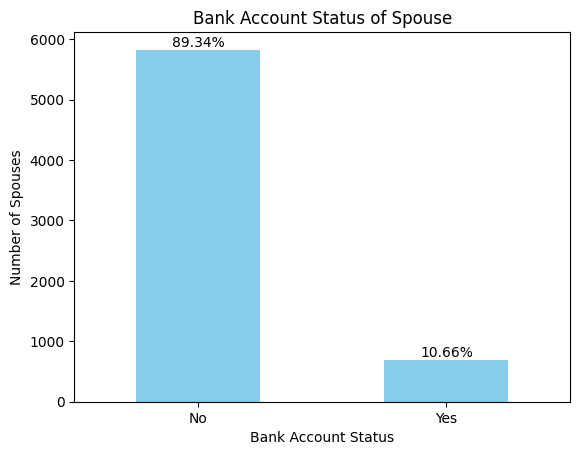

In [27]:
# Let's explore the % of "Spouses" category that have bank account and those that do not

# Filter the data for the Spouse category
spouse = train_df[train_df['relationship_with_head'] == 'Spouse']

# Create a bar chart to visualize the bank account status of Head of Household
bank_account_counts = spouse['bank_account'].value_counts()
ax = bank_account_counts.plot(kind='bar', rot=0, color='skyblue')

# Adding labels and title
plt.xlabel('Bank Account Status')
plt.ylabel('Number of Spouses')
plt.title('Bank Account Status of Spouse')

# Adding percentages to the top of the bars
total_spouse = len(spouse)
for i, count in enumerate(bank_account_counts):
    percentage = (count / total_spouse) * 100
    ax.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

Spouses have a slightly higher percentage, 89.34%, of individuals without a bank account compared to the other group.

In [28]:
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


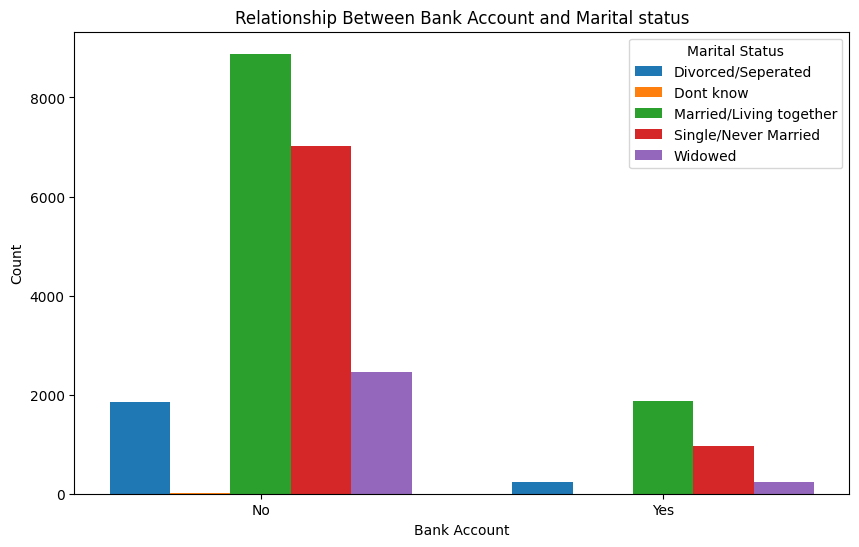

In [29]:
# Lets check the relationship between bank account access and marital status
# Create a pivot table to reshape the data
pivot_table = train_df.pivot_table(index='bank_account', columns='marital_status', aggfunc='size', fill_value=0)

# Define colors for the marital status categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a grouped bar chart
width = 0.15  # Adjust the width as needed
x = np.arange(len(pivot_table.index))

fig, ax = plt.subplots(figsize=(10, 6))

for i, marital_status in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[marital_status], width, label=marital_status, color=colors[i])

# Add labels and title
ax.set_xlabel('Bank Account')
ax.set_ylabel('Count')
ax.set_title('Relationship Between Bank Account and Marital status')
ax.set_xticks(x + (width * (len(pivot_table.columns) - 1)) / 2)
ax.set_xticklabels(pivot_table.index)
ax.legend(title='Marital Status')

# Show the plot
plt.show()

Majority of married/living together and single/never married lack access to bank accounts. However, those who do have one are also the majority.

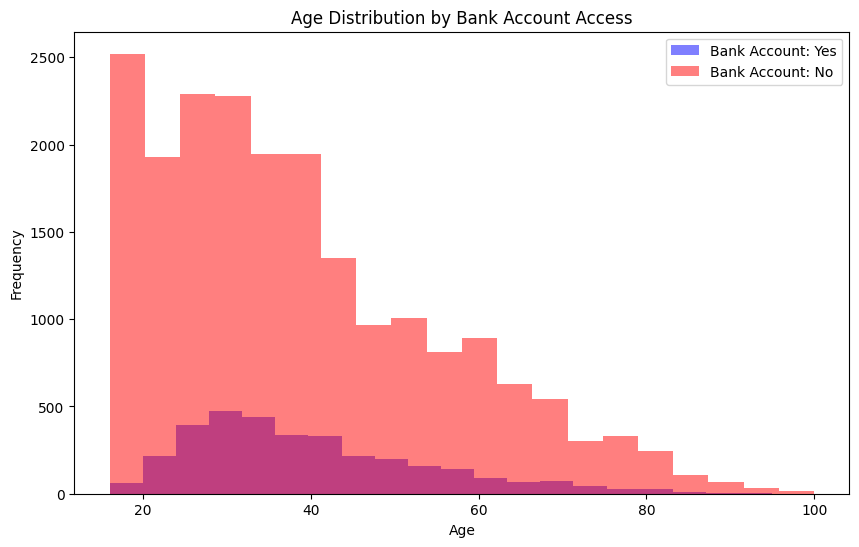

In [30]:
# Lets check the relationship between bank account access and age

# Separate the data into two groups: "Yes" and "No" bank account access
yes_group = train_df[train_df['bank_account'] == 'Yes']
no_group = train_df[train_df['bank_account'] == 'No']

# Create histograms for age in both groups
plt.figure(figsize=(10, 6))
plt.hist(yes_group['age_of_respondent'], bins=20, alpha=0.5, color='blue', label='Bank Account: Yes')
plt.hist(no_group['age_of_respondent'], bins=20, alpha=0.5, color='red', label='Bank Account: No')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Bank Account Access')
plt.legend()

# Show the plot
plt.show()


A significant proportion of people aged 20 to 45 hold bank accounts. Conversely, individuals between the ages of 10 and 70 are less likely to have a bank account. The histograms display a right skew. They show that those beyond 50 years of age tend to have even lower access to banking services.

In [31]:
train_df.job_type.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

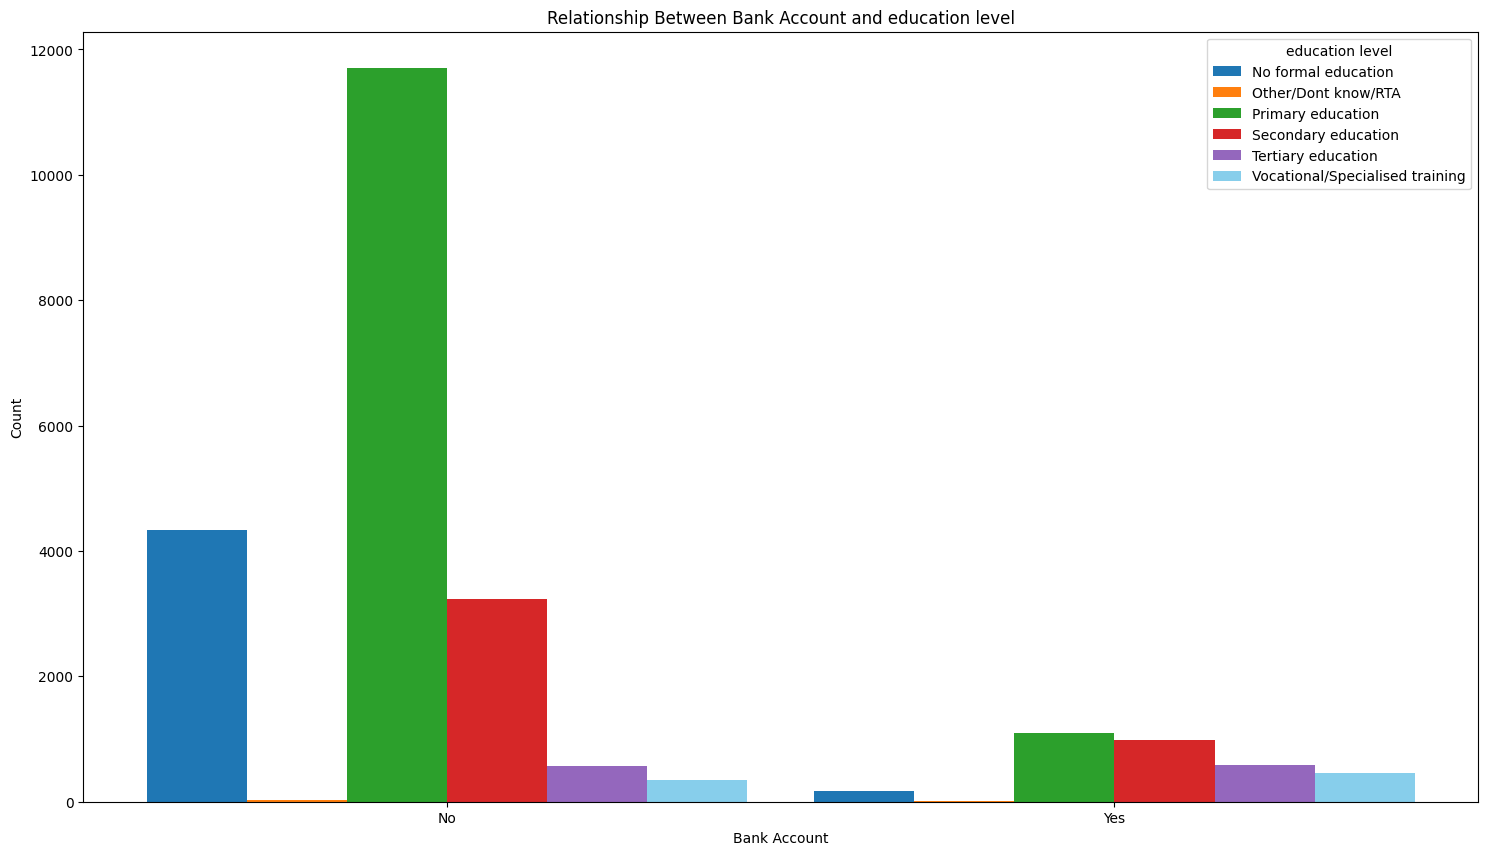

In [32]:
# Lets check the relationship between bank account access and education level
# Create a pivot table to reshape the data
pivot_table = train_df.pivot_table(index='bank_account', columns='education_level', aggfunc='size', fill_value=0)

# Define colors for the marital status categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',"skyblue"]

# Create a grouped bar chart
width = 0.15  # Adjust the width as needed
x = np.arange(len(pivot_table.index))

fig, ax = plt.subplots(figsize=(18, 10))

for i, education_level in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[education_level], width, label=education_level, color=colors[i])

# Add labels and title
ax.set_xlabel('Bank Account')
ax.set_ylabel('Count')
ax.set_title('Relationship Between Bank Account and education level')
ax.set_xticks(x + (width * (len(pivot_table.columns) - 1)) / 2)
ax.set_xticklabels(pivot_table.index)
ax.legend(title='education level')

# Show the plot
plt.show()

The largest group of individuals lacking a bank account had primary-level education, closely followed by those with a secondary education. In contrast, among individuals with a bank account, primary education holders still formed the majority,

There seems to be more primary holders without a bank account.

#### 3. Modelling

In [33]:
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Assigning the X and the Y variable in which the X feature variable has the independent variables and the y feature variable has a dependent variable(bank_account)

In [34]:
# Get X and Y feature variables
X= train_df.drop('bank_account', axis=1)
y= train_df['bank_account']

In [35]:
X.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


We have categorical/qualitative data types in both the independent and dependent variable. To use machine learning effectively, we need to change this data into numbers that machines can understand. We'll do this by using a method called "**one-hot encoding**."

We have will create a simple preprocessing function to:

- Handle conversion of data types
- Convert categorical features to numerical features by using One-hot Encoder and Label Encoder
- Drop uniqueid variable
- Perform feature scaling.

The processing function will be used for both train and test independent variables.

In [36]:
# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

In [37]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    #float_array = data[["household_size", "age_of_respondent",  "year"]].values.astype(float)

    # categorical features to be converted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [38]:
# preprocess the train data
X = preprocessing_data(X)
X_test_preprocessed = preprocessing_data(test_df)

In [39]:
# Encode labels in column 'bank_account'.

# Fit the LabelEncoder object to the Y dependent variable column
le.fit(y)

# Transform the Y dependent variable column using the LabelEncoder object
y = le.transform(y)

# Print the encoded Y dependent variable column
print(y)

[1 0 1 ... 0 0 0]


The dependent variable values have been transformed into numerical datatypes, 1 represents ‘Yes’ and 0 represents ‘No’.

##### Logistic Regression

Logistic regression is a supervised machine learning algorithm mainly used for binary classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. In this case whether an individual is likrly to have a bank account or not.

In [72]:
# split the train and test dataset
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=23)

In [73]:
# LogisticRegression
clf = LogisticRegression(max_iter=1000,random_state=23)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=23)

In [74]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Print the mean absolute error
print('Mean absolute error:', mae)

Mean absolute error: 0.12199787460148778


In [75]:
#evaluate the model with accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8780021253985122
Precision: 0.6897590361445783
Recall: 0.3271428571428571


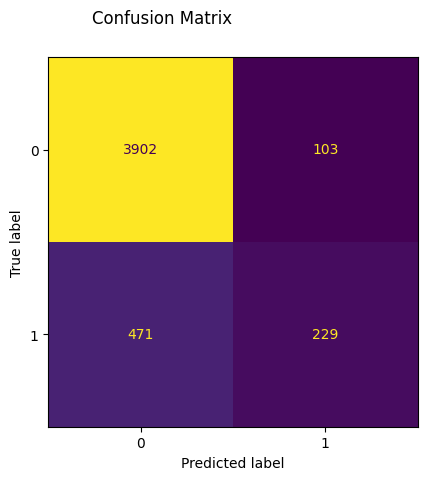

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=clf.classes_)
disp.figure_.suptitle("Confusion Matrix")
disp.im_.colorbar.remove()
plt.show()


Our Logistic Regression model performs well on predicting class 0 and performs poorly on predicting class 1, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values).

We will deal with the class imbalance and see if there will be any improvemnt in performance.

Another way we will try and increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

##### Using SMOTE to deal with class imbalance

In [46]:
# Dealing with class imbalance
# We will use the SMOTE technique
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [47]:
# split the train and test dataset
X_train_smote, X_test_smote,y_train_smote, y_test_smote = train_test_split(x_smote, y_smote,test_size=0.2,random_state=23)

In [48]:
# LogisticRegression
clf = LogisticRegression(max_iter=1000,random_state=23)
clf.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=23)

In [49]:
# Make predictions on the test data
y_pred = clf.predict(X_test_smote)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test_smote, y_pred)

# Print the mean absolute error
print('Mean absolute error:', mae)

Mean absolute error: 0.22869511440940013


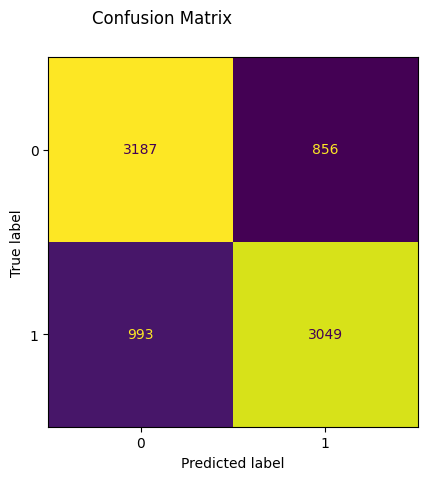

In [50]:
# Calculate the confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test_smote, y_test_smote, display_labels=clf.classes_)
disp.figure_.suptitle("Confusion Matrix")
disp.im_.colorbar.remove()
plt.show()

Using SMOTE reduced the perfromance of our model significantly. Let's try using grid search CV

##### Grid search CV

In [51]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
log_model = GridSearchCV(clf, param_grid,cv=5)
log_model.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",log_model.best_params_)


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}


In [52]:
# fit by setting best parameters and Evaluate model
log_model = LogisticRegression(C=0.1,penalty="l2")

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)


# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Print the mean absolute error
print('Mean absolute error:', mae)

Mean absolute error: 0.12348565356004251


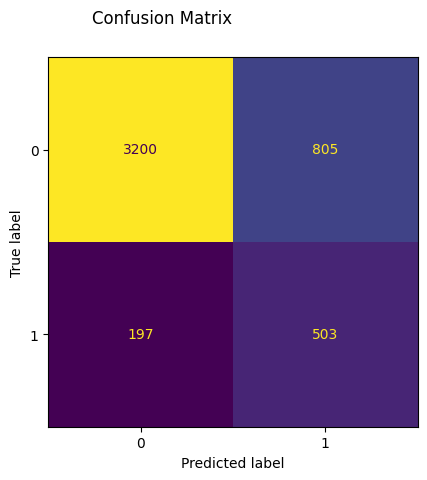

In [53]:
# Calculate the confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=clf.classes_)
disp.figure_.suptitle("Confusion Matrix")
disp.im_.colorbar.remove()
plt.show()

When using grid search with the logistic regression model, we noticed a slight improvement in classifying class 1. Therefore, we plan to explore alternative classification models to see if a more effective model can be identified.

#### XGBoost

In [82]:
#import classifier algorithm
from xgboost import XGBClassifier

# create model instance
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

The success of this model  will be measured by the percentage of survey respondents for whom we make incorrect predictions about their bank account status. Therefore, the lower this percentage, the better the model is performing. In other words, if the model makes fewer mistakes in its predictions, it indicates good performance.

In [83]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_test)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, xg_y_model))

Error rate of XGB classifier:  0.12879914984059515


In [85]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, xg_y_model)

# Print the mean absolute error
print('Mean absolute error:', mae)

Mean absolute error: 0.12879914984059512


In [86]:
#evaluate the model with accuracy, precision, and recall
accuracy = accuracy_score(y_test, xg_y_model)
precision = precision_score(y_test, xg_y_model)
recall = recall_score(y_test, xg_y_model)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8712008501594048
Precision: 0.6169154228855721
Recall: 0.35428571428571426


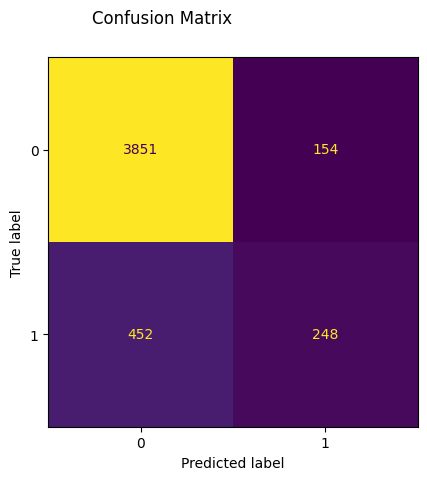

In [55]:
# Get confusion matrix for Gradient Boosting Classifier
disp = ConfusionMatrixDisplay.from_estimator(xg_model, X_test, y_test, display_labels=clf.classes_)
disp.figure_.suptitle("Confusion Matrix")
disp.im_.colorbar.remove()
plt.show()


Just like the logistic regression model, the XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**


The code below will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

In [56]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train, y_train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.8}


In [87]:
# Let’s use these parameter values and see if the XGB model performance will increase.
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=0.5, subsample=0.8, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_test, y_pred))

Error rate of the XGB classifier:  0.12178533475026565


In [88]:
#evaluate the model with accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8782146652497343
Precision: 0.6778711484593838
Recall: 0.3457142857142857


After applying grid search and parameter adjustments, it seems that the model's error rate remains somewhat consistent with the error rate observed when running the model without grid search cross-validation.

#### Random Forest

In [58]:
# Importing the required library
from sklearn.ensemble import RandomForestClassifier

#  creating an instance of the Random Forest model, with the default parameters
rf = RandomForestClassifier()

# fit this to our training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
# check predictions
y_pred = rf.predict(X_test)

In [90]:
# Get error rate
print("Error rate of the RandomForest classifier: ", 1 - accuracy_score(y_test, y_pred))

Error rate of the RandomForest classifier:  0.12688629117959616


In [91]:
#evaluate the model with accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8731137088204038
Precision: 0.6745762711864407
Recall: 0.2842857142857143


The Random Forest classifier, with default parameters, shows a higher overall error rate in comparison to the other model(Logistic and XGBoost). Let's proceed to fine-tune the parameters and assess whether this adjustment leads to improvement.

We will use RandomizedSearchCV to randomly search parameters within a range per hyperparameter.


In [61]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
# defining the hyperparameters to use and their ranges in the param_dist dictionary
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb5414b62c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb521d1f730>})

In [62]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 336}


In [92]:
#  creating an instance of the Random Forest model, with the best parameters
rf = RandomForestClassifier(max_depth=12, n_estimators=336)

# fit this to our training data
rf.fit(X_train, y_train)

# check predictions
y_pred = rf.predict(X_test)

# Get error rate
print("Error rate of the RandomForest classifier: ", 1 - accuracy_score(y_test, y_pred))

Error rate of the RandomForest classifier:  0.12709883103081832


In [93]:
#evaluate the model with accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8729011689691817
Precision: 0.673469387755102
Recall: 0.28285714285714286


There has been a good reduction from 0.14 to 0.12 after applying the RandomizedSearchCV

In [64]:
# Lets see if Grid search will give us better results
# Optimize model parameters
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=5)
rf_grid = grid.fit(X_train,y_train)

In [65]:
print("tuned hpyerparameters :(best parameters) ",rf_grid.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [94]:
# fit by setting best parameters and Evaluate model
rf_grid_model = RandomForestClassifier(max_depth=10,
                                       max_features=7,
                                       min_samples_leaf=1,
                                       min_samples_split=3,
                                       n_estimators=100)

rf_grid_model.fit(X_train, y_train)
# check predictions
y_pred = rf_grid_model.predict(X_test)


In [95]:
# Get error rate
print("Error rate of the RandomForest classifier: ", 1 - accuracy_score(y_test, y_pred))

Error rate of the RandomForest classifier:  0.12646121147715195


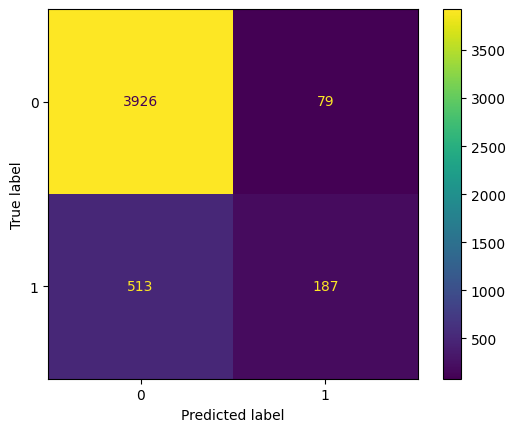

In [69]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [71]:
#evaluate the model with accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8741764080765143
Precision: 0.7030075187969925
Recall: 0.2671428571428571



**Results**

Models | Accuracy | Precision | Recall | Error rate
--- | --- | --- | --- | ---
Logistic Regression | 88 | 69 | 33 | 0.122
XGBoost(GridSearchCV) | 88 | 68 | 35 | 0.122
Random Forest(GridSearchCV) | 87 | 70 | 28 | 0.126


In our analysis, there were more instances of "No" (individuals without a bank account) than "Yes" (those with a bank account). This class imbalance may have had an impact on our model performance, potentially explaining the lower recall values observed. Additionally this is why we used precision and recall to further evaluate our models.

Our analysis revealed that both Logistic Regression and XGBoost with GridSearchCV displayed strong accuracy and precision, with an 88% accuracy and 69-70% precision, outperforming Random Forest. However, for identifying positive instances (recall), XGBoost stood out with 35%, followed closely by Logistic Regression at 33%, while Random Forest lagged slightly with a 28% recall rate. Error rates mirrored these findings, with Logistic Regression and XGBoost at 0.122 and Random Forest at 0.126.

The choice of the best model should be made in consideration of the specific priorities of the task. For precision, the Random Forest model is favored. If a balanced trade-off between precision and recall is important, Logistic Regression or XGBoost might be more suitable. It's essential to account for the dataset's class imbalance, as it can impact the model's performance, especially the recall values for the minority class.

Further fine-tuning and addressing class imbalance may be necessary to optimize model performance for this classification task.